In [65]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
from plots import *

%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [66]:
rotation_rate = 21 # degrees per second
avg_frames = 12 # Number of frames to average over
frames_per_sec = 5 # 1/seconds # Correct?



In [96]:
def V3_revolution(nproj, rr, avgf, fps, add_on=5 ):
    """
    Calculates scan time of one revolution with GoldenRatioV3
    nproj: number of projections
    rr: rotation rate in degrees per second
    avgf: number of frames to average over
    fps: frames per second
    add_on: number of seconds to add on to the scan time
    """

    exposure = nproj * avgf/fps
    rot = 360/rr
    scan_time = exposure + rot + add_on

    exposure_ratio = exposure/scan_time
    return scan_time, exposure_ratio

def V3_angles(nproj, nrevs, starting=0):
    angles = np.zeros((nrevs, nproj))

    golden_angle_sampling = lambda n, inc: np.mod((n * 1/((np.sqrt(5) - 1) / 2) * inc), inc)

    startings = golden_angle_sampling(np.arange(starting,nrevs), 360/nproj)

    linear_sampling = lambda s: np.linspace(s, s + 360, nproj, endpoint=False)

    return linear_sampling(startings).T



In [97]:
# print(V3_angles(10, 10))

%timeit V3_angles(10, 10)
print(V3_angles(10, 10))

29.7 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[[  0.          36.          72.         108.         144.
  180.         216.         252.         288.         324.        ]
 [ 22.24922359  58.24922359  94.24922359 130.24922359 166.24922359
  202.24922359 238.24922359 274.24922359 310.24922359 346.24922359]
 [  8.49844719  44.49844719  80.49844719 116.49844719 152.49844719
  188.49844719 224.49844719 260.49844719 296.49844719 332.49844719]
 [ 30.74767078  66.74767078 102.74767078 138.74767078 174.74767078
  210.74767078 246.74767078 282.74767078 318.74767078 354.74767078]
 [ 16.99689438  52.99689438  88.99689438 124.99689438 160.99689438
  196.99689438 232.99689438 268.99689438 304.99689438 340.99689438]
 [  3.24611797  39.24611797  75.24611797 111.24611797 147.24611797
  183.24611797 219.24611797 255.24611797 291.24611797 327.24611797]
 [ 25.49534157  61.49534157  97.49534157 133.49534157 169.49534157
  205.49534157 241.49534157 277.49534157 313.49534157 349

In [70]:
choose_formatter(incscape=False)


def plot_temp_resolution(nprojs, scan_times, exp_ratios, title= "Golden Ratio V3 Sampling", markers= []):
    """
    Plots the temporal resolution of the scan
    nprojs: number of projections
    scan_time: scan time in seconds
    """
    fig, ax = plt.subplots()

    ax1 = ax.twinx()
    left, = ax.plot(nprojs, scan_times, "-.", color = "#1F449C", label= "Temporal Resolution")
    right, = ax1.plot(nprojs, exp_ratios, ":", color = "#F05039", label= "Exposure Ratio")


    ax.set_xlabel('Projections per Revolution')
    # ax.set_xticks(nprojs)
    # ax.set_xticklabels([str(int(n)) for n in nprojs])
    ax.set_ylabel('Temporal Resolution (s)', color = left.get_color())
    ax1.set_ylabel('Exposure Ratio', color = right.get_color())

    ax.tick_params(axis='y', colors=left.get_color())
    ax1.tick_params(axis='y', colors=right.get_color())

    # plt.legend(handles=[left, right])

    if markers != []:
        mark_plot(markers, ax, ax1, scan_times, exp_ratios, nprojs)
        

    plt.title(title)
    plt.savefig(f"../Results/Golden Angle/temporal_resolution_{title}.pdf", format="pdf") # Save figure, locate Results folder
    plt.show()

def mark_plot(markers, ax, ax1, scan_times, exp_ratios, nprojs):

    for m in markers:
            try:
                arg = np.argwhere(np.isclose(nprojs, [m], rtol=1e-2))[0][0]
                r = scan_times[arg]
                e = exp_ratios[arg]
                # ax.axvline(m, color = "black", linestyle = "--")
                ax.scatter(m, r, color = "black", marker = "o")
                ax.text(m+2, r-15, f"{m}: {int(r)}s {int(e*100)}\%", rotation=0, verticalalignment='bottom')
            except:
                print(f"Marker {m} not found in nprojs. Excluded from plot")
                pass
            finally:
                 continue
    return



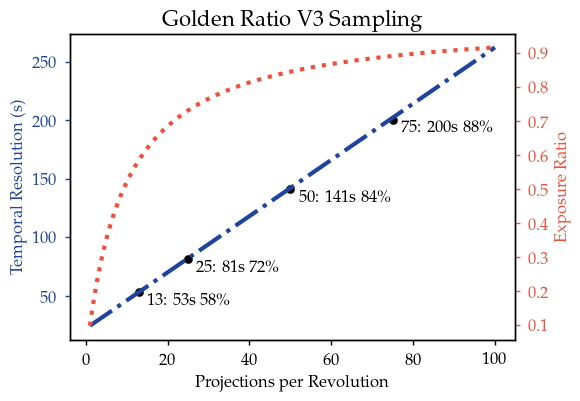

In [71]:
nprojs = np.linspace(1, 100, 1000)
times, ratios = V3_revolution(nprojs, rotation_rate, avg_frames, frames_per_sec)
markers = [13, 25, 50, 75]
plot_temp_resolution(nprojs, times, ratios, markers=markers)

In [130]:
# Plot histogram of distributions

def plot_angle_distributions(angles, title= "Sampling Distributions", bins=500):

    fig, ax = plt.subplots()
    angles = angles.flatten()
    uniform = np.linspace(0, 360, len(angles))

    ax.hist(angles, bins=bins, alpha=0.5, label="GRV3")
    ax.hist(uniform, bins=bins, alpha=0.5, label="Uniform")
    ax.set_xlabel("Angle (degrees)")
    ax.set_ylabel("Number of occurences")
    ax.set_title("Sampling Distributions")

    ax.legend(loc="upper right")
    plt.show()

    mu_gr, mu = np.mean(angles), np.mean(np.linspace(0, 360, len(angles)))

    return


# def plot_time_angle(angles, scan_time, uniform_time, title= "Sampling Distributions" ) # RSD: Necessary???




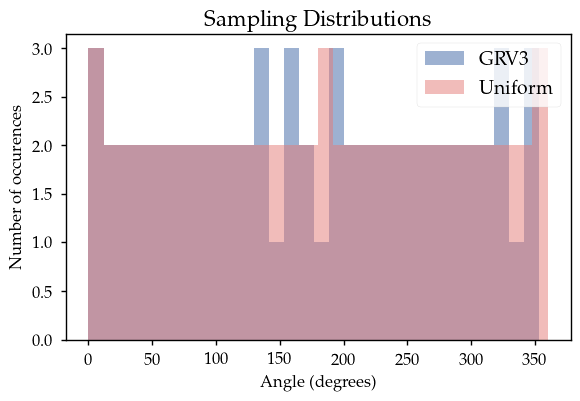

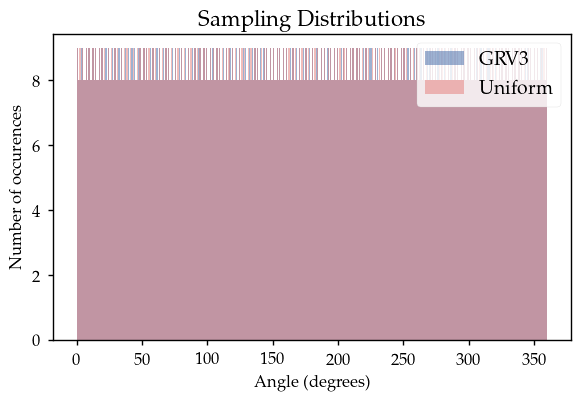

In [131]:
angles = V3_angles(21, 3)

plot_angle_distributions(angles, bins=30)


angles = V3_angles(13, 233)

plot_angle_distributions(angles, bins=360)